In [1]:
# 有趣的数学小游戏-凯利公式控制仓位
# 结果分析
# 1. 单个参与者单次数学期望为正，不代表所有参与者收益为正
# 2. 单次统计数学期望为正只是基本条件，还需要统计2次，3次...多次的数学期望
# 3. 单词数学期望为正，>2次数学期望为负，会产生赢家通吃的结果，虽然总体计算盈利，但大多数人会亏
# 4. 仓位控制得当，所有参与者就可能均分利益
# 5. 控制仓位的最佳方法是凯利公式
# 6. 要永远警惕那些看起来期望为正，胜率却不够高的游戏；比如择时择股胜率超过50%的明星基金，但50%的胜率其实远远不够
# 7. 少交易，能够提高胜率；或者反过来理解，交易的越多，好运气消耗的越快；越耐心，好运气积累的越多；

投注最佳仓位:0.441176470588234
获胜人数：91
最大赢家资金：530545.3668652792


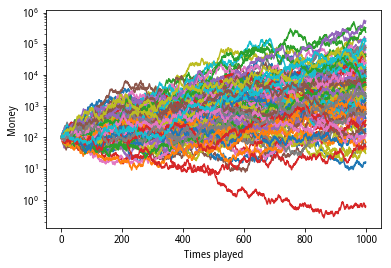

In [44]:
# 凯利公式控制仓位
import numpy as np
import matplotlib.pyplot as plt
 
P = 100 # Number of players
N = 1000 # Total times played for one player
win = 1.2
lose = 0.83
Num_of_winner = 0
Money_of_the_luckiest_winner = 0.0
 
W = abs(win-1)
L = abs(lose-1)
Kelly_percentage = (0.5*W-0.5*L)/(W*L)
print("投注最佳仓位:{}".format(Kelly_percentage)) # is about 0.44 in our case
 
for j in range(P):
    m = np.zeros(N)
    m[0] = 100.0
    for i in range(1,N):
        if np.random.randint(2):
            m[i] = m[i-1]*win*Kelly_percentage + m[i-1]*(1-Kelly_percentage)
        else:
            m[i] = m[i-1]*lose*Kelly_percentage + m[i-1]*(1-Kelly_percentage)
 
    if m[-1] > m[0]:
        Num_of_winner += 1
    if m[-1] > Money_of_the_luckiest_winner:
        Money_of_the_luckiest_winner = m[-1]
    plt.semilogy(m)
 
 
print("获胜人数：{}".format(Num_of_winner))
print("最大赢家资金：{}".format(Money_of_the_luckiest_winner))
plt.xlabel('Times played')
plt.ylabel('Money')
plt.show()